In [1]:
#
from modules.env import *
env4()
from modules.molprep import *
from modules.descriptors import *
from modules.fingerprint import *
import pandas as pd
import numpy as np

#from image import image

#from processing import *
#from model import Model
#from __future__ import print_function
from modules.processing import *
from modules.model import Model
from modules.model import ModelC
from numpy import mean
from modules.importance import *
import sys
from modules.basic import *
#sys.stdout = open("D:/pych/ml/qsar-mr1/lime2.txt", "w+")

from modules.plots import *
DEBUG=True

######################################

In [2]:
#csv="D:/pych/ml/qsar-mr1/MR13D.csv"
path="data/"

#input
sdffile=path+"all.sdf"
activity=path+"MR1.csv"
#output
twod=path+"MR1-2d.sdf"
threed=path+"MR1-3D.sdf"
des_csv=path+"Descriptors_Table_MR1.csv"
des_datafile=path+"des-MR1.data"
finger_table=path+"Descriptors_Table-finger.csv"
finger_data=path+"finger-MR1.data"
frag_csv=path+"Descriptors_Table_MR1_des_frag.csv"
frag2_csv=path+"Descriptors_Table_MR1_des_frag2.csv"
frag3_csv=path+"Descriptors_Table_MR1_des_frag3.csv"

frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
############################################################################################################################################

In [3]:
print(DEBUG)
log(os.getcwd(),DEBUG)

True
D:\pych\ml\MR1


In [4]:
#For the first time preparation of the data from the input sdf file
#smi
Molecules = mol_enumerate(sdffile,threed,twod, format="sdf")

1
ago-anta-Tetrahydroxy-1-4-quinone-hydrate.1 to 3d
2
ago-strong-anta_CID_8536-Menadione sodium bisulfite.1 to 3d
3
ago_CID_2333-Benzbromarone.1 to 3d
4
ago_CID_2722-Chloroxine.1 to 3d
5
ago_CID_5790-Floxuridine.1 to 3d
6
ago_CID_667490-Mercaptopurine.1 to 3d
7
ago_CID_5281616-Galangin.1 to 3d
8
anta_CID_10637-1-2-Naphthoquinone-4-sulfonic acid.1 to 3d
9
anta_CID_50942-Doxofylline.1 to 3d
10
anta_CID_122903-Dehydroacetic-acid.1 to 3d
11
anta_CID_5280445-Luteolin.1 to 3d
12
anta_CID_5280961-Genistein.1 to 3d
13
anta_CID_5281605-Baicalein.1 to 3d
14
CID_1-4-Benzodioxan-6-carboxaldehyde.1 to 3d
15
CID_6-Chloro-4-hydroxy-coumarine.1 to 3d
16
CID_227-Anthranilic-acid.1 to 3d
17
CID_323-Coumarin.1 to 3d
18
CID_1047-2-Pyrazinecarboxylic-acid.1 to 3d
19
CID_2015-Acridone.1 to 3d
20
CID_2022-Acyclovir.1 to 3d
21
CID_2265-Azathioprine.1 to 3d
22
CID_2471-Bumetanide.1 to 3d
23
CID_2662-Celecoxib.1 to 3d
24
CID_2720-Chlorothiazide.1 to 3d
25
CID_3059-Diflunisal.1 to 3d
26
CID_3182-Dyphylline.1 to 

In [9]:
#For generating descriptor table using rdkit descriptors
data_list = desc (threed,type="sdf")
data_table=dataframe(data_list, input_activities=activity,output=des_csv,type1="file", type2="des")
#print (data_table)
set1 = data_prep (des_csv, Scaled ="on", Normal = "off", FS="clas", Cor="on", TARGET="cat1", ndes =13, rs=100, vt=0.5, output=des_datafile)


In [10]:
#finger
data_list = desc (threed,type="sdf")
fp_list = make_fingerprints(rdkit.Chem.SDMolSupplier(threed),data_list)
data_table=dataframe(fp_list, input_activities=activity,TARGET="cat1", output=finger_table,type1=threed,type2="finger")
set = data_prep (finger_table, Scaled ="off", Normal = "off", FS="reg", Cor="on", TARGET="cat1", ndes =50, rs=1,output=finger_data,vt=0)

In [7]:
#generating images
Molecules = mol_enumerate(sdffile,threed,twod, format="sdf", image=True, imagepath="D:/pych/ml/MR1/images/")
#from modules.image import *


#data_list=image("D:/pych/ml/MR1/images/", ".svg", "D:/pych/ml/MR1/data/images_raw.csv")
#data_table=dataframe(data_list, input_activities="D:/pych/ml/dr3/IC50.csv",output="D:/pych/ml/dr3/Descriptors_Table_images.csv",type1="D:/pych/ml/dr3/MR1.sdf",type2="image")
#set = data_prep ("D:/pych/ml/dr3/Descriptors_Table_images.csv", Scaled ="on", Normal = "off", FS="clas", Cor="off", ndes =100, rs=100, vt=0.0
                    # , output="D:/pych/ml/dr3/image-MR1.data")#cor=on will raise error for very larg data like images due to MemoryError

def pause(DEBUG,s="Pause: push a button to continue",):
    if DEBUG:
        input(s)
        print ("continue ........")
#pause(DEBUG)

1
ago-anta-Tetrahydroxy-1-4-quinone-hydrate.1 to 3d
2
ago-strong-anta_CID_8536-Menadione sodium bisulfite.1 to 3d
3
ago_CID_2333-Benzbromarone.1 to 3d
4
ago_CID_2722-Chloroxine.1 to 3d
5
ago_CID_5790-Floxuridine.1 to 3d
6
ago_CID_667490-Mercaptopurine.1 to 3d
7
ago_CID_5281616-Galangin.1 to 3d
8
anta_CID_10637-1-2-Naphthoquinone-4-sulfonic acid.1 to 3d
9
anta_CID_50942-Doxofylline.1 to 3d
10
anta_CID_122903-Dehydroacetic-acid.1 to 3d
11
anta_CID_5280445-Luteolin.1 to 3d
12
anta_CID_5280961-Genistein.1 to 3d
13
anta_CID_5281605-Baicalein.1 to 3d
14
CID_1-4-Benzodioxan-6-carboxaldehyde.1 to 3d
15
CID_6-Chloro-4-hydroxy-coumarine.1 to 3d
16
CID_227-Anthranilic-acid.1 to 3d
17
CID_323-Coumarin.1 to 3d
18
CID_1047-2-Pyrazinecarboxylic-acid.1 to 3d
19
CID_2015-Acridone.1 to 3d
20
CID_2022-Acyclovir.1 to 3d
21
CID_2265-Azathioprine.1 to 3d
22
CID_2471-Bumetanide.1 to 3d
23
CID_2662-Celecoxib.1 to 3d
24
CID_2720-Chlorothiazide.1 to 3d
25
CID_3059-Diflunisal.1 to 3d
26
CID_3182-Dyphylline.1 to 

13
105


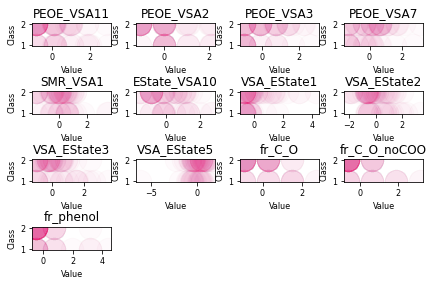

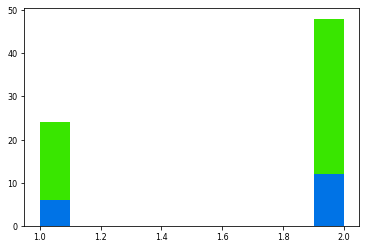

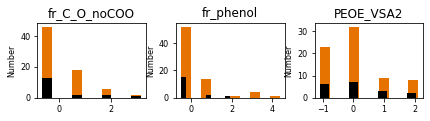

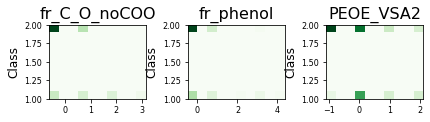

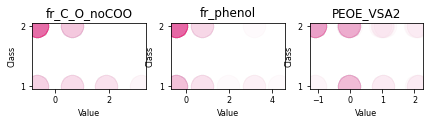

In [11]:
if "plot"=="plot":
    f=[]
    #set1 = data_prep(des_csv, Scaled="on", Normal="off", FS="reg", Cor="on", ndes=50, rs=4, vt=0.5,
                     #output="D:/pych/ml/qsar-mr1/des-qsar-mr1.data")
    #set1 = file2object("D:/pych/ml/qsar-mr1/des-qsar-mr1.data")

    print (len(set1[4]))
    print (len(set1[7]))

    f=["fr_C_O_noCOO", 	"fr_phenol",  "PEOE_VSA2"]
    f1=["fr_C_O_noCOO", 	"fr_phenol", "PEOE_VSA2", "NumHDonors", "VSA_Estate8"]
    #print set1[0].iloc[:,0]
    #set5=pd.DataFrame(set1[0])
    #print set5
    #print set5.iloc[0][1]

    #set1[0].iloc[:, 10]
    #plt.hist(set1[0].iloc[:,10])
    #plt.hist(set1[0].loc[:,"fr_amide"])

    import matplotlib.pyplot as plt

    # plot a line, implicitly creating a subplot(111)
    #plt.plot([1, 2, 3])
    # now create a subplot which represents the top plot of a grid
    # with 2 rows and 1 column. Since this subplot will overlap the
    # first, the plot (and its axes) previously created, will be removed
    #plt.subplot(211)
    #plt.show()

    #plt.hist(set1[0]["fr_amide"])#,bins=)
    #plt.title("fr_amide")
    #plt.xlabel("Number")
    #plt.ylabel("Frequency")
    #plt.xticks([1, 2, 3, 4, 5])
    #plt.show()

    #myplot(set1[0], set1[1], n=8, type="his")
    #myplot(set1[0], set1[1], n=8, type="his2d")

    allx = pd.concat([set1[0], set1[2]], axis=0)
    ally = list(set1[1]) + list(set1[3])

    myplot(set1[0], set1[1], n=4, type="scat")

    plt.hist(set1[1] ,bins=10, color ="#39e600" )
    plt.hist(set1[3], bins=10, color="#0073e6")
    plt.show()

    myplot (set1[0].loc[:,f],set1[1],n=3,type="his", df2=set1[2].loc[:, f], y2=set1[3])
    myplot(set1[0].loc[:, f], set1[1], n=3, type="his2d")
    myplot(set1[0].loc[:, f], set1[1], n=3, type="scat")

    #plt.subplots(2, 2)
    #plt.subplot(2,2,2)
    #plt.bar(set1[0]["fr_amide"], set1[1],color="cyan")
    #plt.show()
    

In [12]:
#################################################################################################################################################################################################################
reg = [ "pls", "mlr", "rf", "lsvm", "lasso","nn", "tree", "rg",  "or", "brg",  "hub", "sgdr", "ex", "gb","ada"]
#svm,"el", "la", "ll",, "ardr":long , "ransa", "kn", "gu", "bg", "the": a bit long
reg2=["rf","svm","nn"]
reg3=["nn"]
reg4= ["rf","ex","gb","nn"]
clas5=["rf","lsvm", "tree", "ex", "lr"]
clas5=["tree"]
clas6=["lsvm","lr","kn","gunb"]
c=10
################################################################################################################

In [10]:
if "loop1"=="loop1":#Loop over diifferent algorithms and RSs of the Models
    print ("LOOP1")
    #set1 = data_prep(des_csv, Scaled="on", Normal="off", FS="reg", Cor="on", ndes=50, rs=10, vt=0.5,
                     #output="D:/pych/ml/qsar-mr1/des-qsar-mr1.data")
    #set1 = file2object("D:/pych/ml/qsar-mr1/des-MR1.data")
    print (len(set1[4]))
    print (len(set1[7]))
    c = 1
    for m2 in clas6:

        print (50 * "*")
        print ("model= ", m2)
        #print "test set", set1[3]
        for s in range (100,101):
            model = ModelC (set1[0],set1[1],set1[2],set1[3],set1[4], M=m2, c1=c,  cv="loo", rs=s)#cv=loo
            if m2 !="mlr":
                #print (m2, s, "R2=", model[0]["R2"], "q2=", model[1]["q2"], "q2F=",model[1]["Q2F2"],"R2test=",model[0]["R2_test"], "R2-q2=", model[0]["R2"]- model[1]["q2"])# model[0]["Pearson"],
                print (m2, s, "Ac=", model[0]["accuracy_score_train"], "Ac_CV=", model[0]["accuracy_score_LOO"], "Ac_test=", model[0]["accuracy_score_test"])  # model[0]["Pearson"],#VI=np.sort(model[0]["Variable Importance"])
                VI = model[0]["Variable Importance"]
                print (VI)

                print("confusion matrix train", model[0]["confusion matrix"])
                print("confusion matrix CV", model[0]["confusion matrix_CV"])
                print("confusion matrix test",
                      ((str(model[0]["confusion matrix_test"].tolist())).replace('L', '')).replace(',', ';'))

                print ("###################################################################################")
                print(model[0])
                print("###################################################################################")
            else:
                print ("q2=", model[1],"q2F2=",model[1]["Q2F2"],model[0])

            #lime2(model[2], set1[0], set1[4], n=8)
            #tree(model[2], set1[0], set1[4])
            #partial(set1[0],set1[1],model[0]["Variable Importance"],n=4)
        print (50 * "#")
#xx=set1[0].loc[:,f]
#xxt=set1[2].loc[:,f]
#fff=f
    





LOOP1
13
105
**************************************************
model=  lsvm
lsvm 100 Ac= 0.9027777777777778 Ac_CV= 0.8055555555555556 Ac_test= 0.7777777777777778
                     0
fr_C_O_noCOO -0.709753
fr_phenol    -0.509509
VSA_EState3  -0.251728
VSA_EState2  -0.225162
PEOE_VSA2    -0.116377
VSA_EState5  -0.070935
VSA_EState1   0.001456
fr_C_O        0.015121
PEOE_VSA11    0.016229
SMR_VSA1      0.117092
PEOE_VSA3     0.172004
PEOE_VSA7     0.249620
EState_VSA10  0.271045
confusion matrix train [[19  2]
 [ 5 46]]
confusion matrix CV [[16  6]
 [ 8 42]]
confusion matrix test [[3; 1]; [3; 11]]
###################################################################################
{'y1':     observed
68         2
11         1
89         1
85         1
47         2
..       ...
9          1
10         1
53         2
23         2
22         2

[72 rows x 1 columns], 'y2':     predicted
68          2
11          1
89          1
85          1
47          2
..        ...
9           1
10   

{'y1':     observed
68         2
11         1
89         1
85         1
47         2
..       ...
9          1
10         1
53         2
23         2
22         2

[72 rows x 1 columns], 'y2':     predicted
68          2
11          1
89          1
85          1
47          2
..        ...
9           1
10          1
53          2
23          2
22          2

[72 rows x 1 columns], 'confusion matrix': array([[24,  0],
       [ 0, 48]], dtype=int64), 'accuracy_score_train': 1.0, 'accuracy_score_test': 0.7222222222222222, 'accuracy_score_LOO': 0.7916666666666666, 'Variable Importance': '', 'probability_train': array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0.

In [13]:
set_data="D:/pych/ml/MR1/data/des-qsar-mr1.data"
model_data="D:/pych/ml/MR1/data/qsar-mr1.data"
if "local"=="local":
    set1 = data_prep(des_csv, Scaled="on", Normal="off", FS="reg", Cor="on", ndes=50, rs=1, vt=0.5,TARGET="cat1",
                     output=set_data)
    set1 = file2object(set_data)

    print (len(set1[4]))
    print (len(set1[7]))
    c = 10
    m2="nn"
    model = ModelC (set1[0],set1[1],set1[2],set1[3],set1[4], M=m2, c1=c,  cv="kf", rs=85)
    object2file(model,model_data)
    model=file2object(model_data)
    
    #VI1=np.sort(model[0]["Variable Importance"])
    VI2 = model[0]["Variable Importance"]
    #print VI1
    print (VI2)

    #partial(set1[0], set1[1], model[0]["Variable Importance"], n=7) #this line prodce error in scikit-learn 0.24

    #winsound.Beep(frequency, duration)

    #print set1[4]
    #print set1[4][15]
    #print set1[4][56]
    #print set1[4][0]
    #print set1[0]

    range1=[54,76,117,720,50,237,275,279,1012,1030,1082,1105,1131,1144]

    if "lime"=="lime1":
        lime3=lime2(model[1], set1[0], set1[4],n=6,y=set1[1],i=0)
        object2file(lime3,"D:/pych/ml/MR1/data/lime.data")
        lime3=file2object("D:/pych/ml/MR1/data/lime.data")
        #for i in range(len(lime3)):
            #print"number",i, lime3[i]
        for i in range1:
            print("Lime number",i, lime3[i])
        #input("pause")

    #winsound.Beep(frequency, duration)

   
    if "tree"=="tree111":#I would not be able to install it by conda
        #TreeI=tree(model[2], set1[0], set1[4],set1[1]);print TreeI[2]
        #object2file(TreeI, "D:/pych/ml/qsar-mr1/treei.data")
        tree_in3 = file2object("D:/pych/ml/MR1/data/treei.data")
        #print len (tr_in[0])
        #for i in range(len(tr_in[0])):
            #print"number",i, tr_in[0][i]
        for i in range1:
            print("TreeI number",i, tree_in3[0][i])

            print (i, set1[0].index.tolist()[i])
        #print "all df", tr_in[1]
        #print "average importance in the set", tr_in[2]

   

50
105
                                0
SMR_VSA10               -2.540448
MinEStateIndex          -1.562177
fr_phenol               -1.504168
VSA_EState3             -1.441327
PEOE_VSA2               -1.270104
fr_aniline              -1.206190
fr_C_O_noCOO            -1.185465
VSA_EState2             -1.022708
fr_C_O                  -1.019729
SlogP_VSA10             -1.000784
PEOE_VSA5               -0.953685
EState_VSA2             -0.937121
PEOE_VSA11              -0.913702
EState_VSA10            -0.913388
SlogP_VSA11             -0.857517
SlogP_VSA7              -0.855564
SMR_VSA1                -0.769931
NumHDonors              -0.675918
Chi4v                   -0.652796
VSA_EState8             -0.555339
MolLogP                 -0.521031
fr_Al_OH_noTert         -0.495403
PEOE_VSA9               -0.473002
PEOE_VSA4               -0.452864
PEOE_VSA10              -0.432861
SlogP_VSA2              -0.293265
VSA_EState7             -0.267556
SMR_VSA9                -0.220128
SlogP_V

In [ ]:
if "testset"=="testset111":

    #Modeling:

    #Molecules = mol_enumerate(csv, threed, twod, format="smi")
    #data_list = desc(threed, type="sdf")
    #object2file(Molecules,"D:/pych/ml/qsar-mr1/Molecules.data")
    #object2file(data_list, "D:/pych/ml/qsar-mr1/data_list.data")
    Molecules=file2object("D:/pych/ml/qsar-mr1/Molecules.data")
    data_list=file2object("D:/pych/ml/qsar-mr1/data_list.data")
    datalistnew = file2object("D:/pych/ml/qsar-mr1/data_list.data")
    #print Molecules [0:2]
    #print data_list [0]
    input("pause 2")
    print ("continue ...")

    #data_table = dataframe(data_list, input_activities="D:/pych/ml/qsar-mr1/qsar-mr1-IC50.csv", output=des_csv, type1=threed,type2="des")

    #set1 = data_prep("D:/pych/ml/dr3/Descriptors_Table_itk_des.csv", Scaled="on", Normal="off", FS="on", Cor="on",
                     #ndes=100, rs=2, vt=0.5, output="D:/pych/ml/dr3/des-itk.data")
    set1 = file2object("D:/pych/ml/qsar-mr1/frag3-qsar-mr1.data")

    #model = Model(set1[0], set1[1], set1[2], set1[3], set1[4], M="rf", c=14, cv="kf", rs=85)
    model=file2object("D:/pych/ml/qsar-mr1/qsar-mr1.data")
    print (model[0]["R2_test"], model[1]["q2"], model[0]["R2"], model[0]["Pearson"], model[0]["R2"] - model[1]["q2"])

    #Testing:
    csv_test = "D:/pych/ml/qsar-mr1/extraset4.csv"
    twod_test = "D:/pych/ml/qsar-mr1/qsar-mr1-2D_test4.sdf"
    threed_test = "D:/pych/ml/qsar-mr1/qsar-mr1-3D_test4.sdf"
    des_csv_test = "D:/pych/ml/qsar-mr1/Descriptors_Table_qsar-mr1_des_test4.csv"
    frag3_csv_test = "D:/pych/ml/qsar-mr1/Descriptors_Table_qsar-mr1_frag3_test4.csv"

    Molecules_test = mol_enumerate(csv_test, threed_test, twod_test, format="smi")
    #Molecules_test = mol_enumerate("D:/pych/ml/qsar-mr1/qsar-mr1-testtest.sdf", threed_test, twod_test, format="sdf")
    data_list_test = desc(threed_test, type="sdf")

    dd=set1[2].index.tolist()
    for i in range(len(datalistnew[0])):
        p=0
        for j in range(len(dd)):
            if datalistnew[0][i]==dd[j]:
                datalistnew[0][i]="test-"+datalistnew[0][i]
                p=1
        if p==0:
            datalistnew[0][i] = "train-" + datalistnew[0][i]

    #print set1[2].index.tolist()
    print (datalistnew[0])
    datalistnew[0] = datalistnew[0] + data_list_test[0]
    #datalistnew[0]= dd+data_list_test[0]

    finger = tanimoto(Molecules+Molecules_test, datalistnew,"D:/pych/ml/qsar-mr1/tanimoto-extest4.csv")
    print (finger)

    #print len (datalistnew[0])
    #print len(data_list[0])

    data_table = dataframe(data_list_test, input_activities="",output=des_csv_test, type1="file",type2="des")

    input("pause...123..edit fragfile")
    print ("continue ...")

    set2 =data_prep (frag3_csv_test, newset="on", org_v_names=set1[4], Xnormalized=set1[5], Xscaled=set1[6], v_names2=set1[7],output="D:/pych/ml/qsar-mr1/frag3-qsar-mr1_test4.data",ref_X_train=set1[0])
    print (set2[0])
    model1 = (model[2]).predict(set2[0])
    print (model1)

    #winsound.Beep(frequency, duration)
    input("testing is finished")
    print ("continue ...")
print ("finish 3")